### Plot model performance vs datasets with different anomaly characteristics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob
import os
os.chdir('/home/roman/Documents/HU/CISC600_ScientificComputing/Project/')

In [2]:
def load_results(name):
    with open(name, 'rb') as f:
        return pickle.load(f)

In [3]:
def plots(kind, model_names):
    results_all = []
    for model in model_names:
        pkl_results = glob.glob('results/results_{}_{}*'.format(kind, model))
        assert(len(pkl_results) == 1)
        results_all.append(load_results(pkl_results[0]))
    y = dict()
    for model_name in model_names:
        y[model_name] = []
    for dataset in results_all[0].keys():
        colors = ['blue', 'green', 'red', 'orange', 'purple', 'darkblue', 'black']\
            [:len(model_names)]
        x = np.array(list(results_all[0][dataset].keys()))
        for model_name, results, color in zip(model_names, results_all, colors):
            y_ = [i[2] for i in results[dataset].values()]
            y[model_name].append(y_)
            plt.plot(x, np.array(y_), color=color, marker='o')
        plt.title('Results {} {}'.format(kind, dataset))
        plt.xlabel('point difficulty')
        plt.ylabel('ROC AUC')
        plt.legend(model_names)
        plt.show()
    for model_name, color in zip(model_names, colors):
        plt.plot(x, np.mean(np.array(y[model_name]), axis=0), color=color, marker='o')
    plt.title('Results {} - mean'.format(kind))
    plt.xlabel(kind)
    plt.ylabel('ROC AUC')
    plt.legend(model_names)
    plt.show()

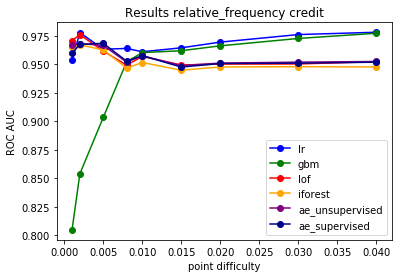

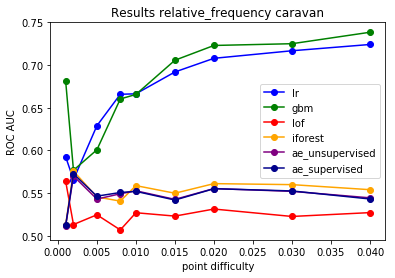

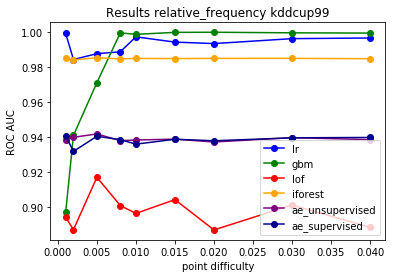

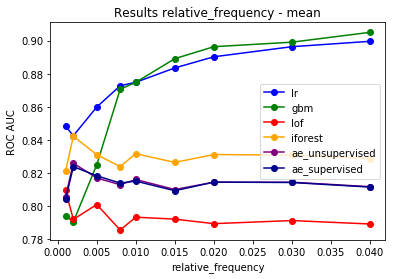

In [4]:
model_names = ['lr', 'gbm', 'lof', 'iforest', 'ae_unsupervised', 'ae_supervised']
plots('relative_frequency', model_names)

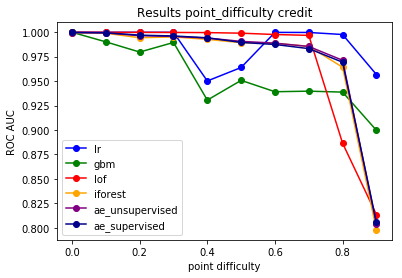

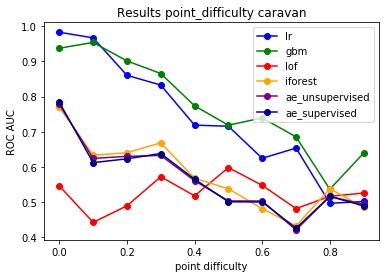

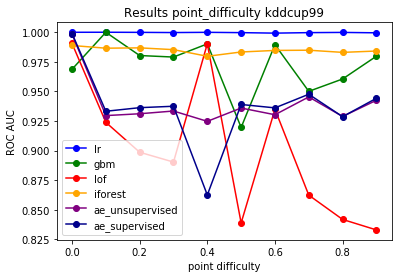

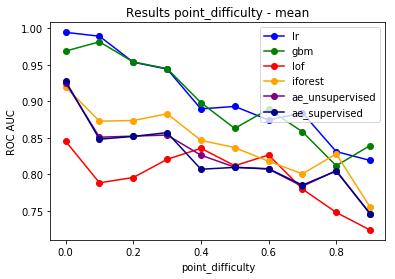

In [5]:
plots('point_difficulty', model_names)

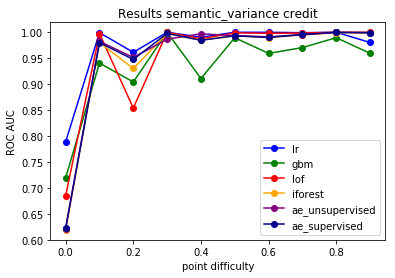

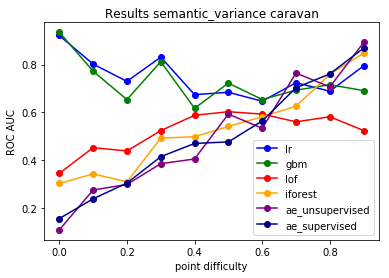

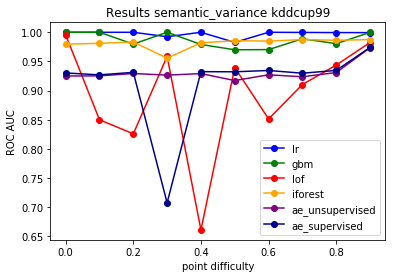

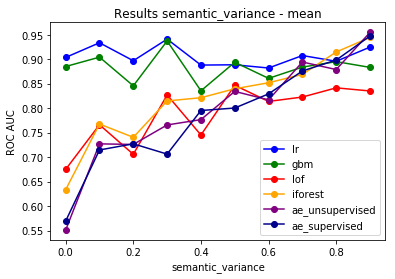

In [6]:
plots('semantic_variance', model_names)